<h1>Computer Graphics week10 : Convolution Layer</h1>

<h2>201702052 Lee Dongheon</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_inputs, train_labels), (test_inputs, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_inputs.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


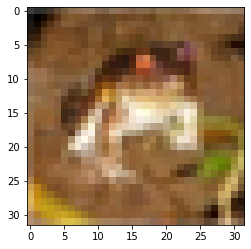

In [4]:
plt.imshow(train_inputs[0])
plt.show()

In [5]:
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

<h2>Week 10 Homework : Convolution Layer</h2>

<h3>input(32, 32, 3) -> Conv2D(28, 28, 12) -> Pooling -> Conv2D(10, 10, 8) -> output(10)</h3>

In [6]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Conv2D(filters=12, kernel_size=(5, 5), strides=(1, 1), padding='valid'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='valid'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(10, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 12)        912       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 8)         2408      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8010      
                                                                 
Total params: 11,330
Trainable params: 11,330
Non-trainable params: 0
____________________________________________________

In [8]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [9]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6250/6250 [==============================] - 59s 5ms/step - loss: 1.6863 - acc: 0.4068 - val_loss: 1.5602 - val_acc: 0.4475
Epoch 2/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.4783 - acc: 0.4890 - val_loss: 1.3943 - val_acc: 0.5242
Epoch 3/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.3914 - acc: 0.5208 - val_loss: 1.3201 - val_acc: 0.5453
Epoch 4/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.3568 - acc: 0.5352 - val_loss: 1.3395 - val_acc: 0.5379
Epoch 5/20
6250/6250 [==============================] - 30s 5ms/step - loss: 1.3267 - acc: 0.5469 - val_loss: 1.3584 - val_acc: 0.5326
Epoch 6/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.3117 - acc: 0.5498 - val_loss: 1.3186 - val_acc: 0.5475
Epoch 7/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.2912 - acc: 0.5579 - val_loss: 1.3650 - val_acc: 0.5297
Epoch 8/20
6250/6250 [==============================] - 27s 4ms/st

<h2>Week 10 Practice</h2>

In [10]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax'),
                          ])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               393344    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_flatten = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
test_output1 = model_flatten(tf.expand_dims(train_inputs[0],axis=0))
print(test_output1)

tf.Tensor([[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]], shape=(1, 3072), dtype=float32)


In [13]:
model_dense1 = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
test_output2 = model_dense1(tf.expand_dims(train_inputs[0],axis=0))
print(test_output2)

tf.Tensor(
[[0.9867406  0.         0.         0.         0.6484935  0.
  0.         0.05707669 0.12842438 0.15441097 0.89582616 0.
  0.         0.09603086 0.21946645 0.         0.49707627 0.62868834
  0.33621433 0.         0.         0.         0.32056332 0.49144825
  0.         1.5183632  0.         0.         1.3587449  0.8421246
  0.3636838  0.         0.         0.1458044  0.         0.
  0.79588014 0.17663608 0.56010437 0.         0.         0.02585477
  0.         0.08282121 0.         1.0455151  0.         0.26582402
  0.         0.02241808 0.         0.39617586 0.         0.19015062
  0.73290515 0.36241588 0.         0.         0.21619943 0.67687964
  0.         0.9617567  0.         0.22869447 0.247407   0.28242642
  0.         0.47955164 0.         0.         0.3584804  0.
  0.         0.19311586 0.3284836  0.93151355 0.63956535 0.
  0.2998563  0.         0.         0.15617545 0.         0.05831589
  0.         0.         0.         0.29477662 0.         0.
  0.         0.444

In [14]:
model_dense2 = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
test_output3 = model_dense2(tf.expand_dims(train_inputs[0],axis=0))
print(test_output3)

tf.Tensor(
[[0.09826849 0.04889492 0.15180488 0.11204456 0.11409294 0.12559976
  0.03714223 0.09867008 0.09089244 0.12258971]], shape=(1, 10), dtype=float32)


In [15]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [16]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6250/6250 [==============================] - 21s 3ms/step - loss: 1.9369 - acc: 0.2793 - val_loss: 1.8756 - val_acc: 0.2937
Epoch 2/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.8551 - acc: 0.3174 - val_loss: 1.8221 - val_acc: 0.3259
Epoch 3/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.8330 - acc: 0.3278 - val_loss: 1.7960 - val_acc: 0.3452
Epoch 4/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.8152 - acc: 0.3344 - val_loss: 1.8292 - val_acc: 0.3250
Epoch 5/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.8040 - acc: 0.3365 - val_loss: 1.8085 - val_acc: 0.3298
Epoch 6/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.7950 - acc: 0.3406 - val_loss: 1.8041 - val_acc: 0.3303
Epoch 7/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.7894 - acc: 0.3413 - val_loss: 1.8087 - val_acc: 0.3369
Epoch 8/20
6250/6250 [==============================] - 21s 3ms/st